# Importing modules and input data

In [20]:
import pandas as pd
from numpy import where
from numpy import meshgrid
from numpy import arange
from numpy import hstack
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
diabetes = pd.read_csv('diabetes.csv')

# Training and test data set

In [21]:
features = ['Pregnancies','PlasmaGlucose','DiastolicBloodPressure','TricepsThickness','SerumInsulin','BMI','DiabetesPedigree','Age']
target = 'Diabetic'
X, y = diabetes[features], diabetes[target]

X_train, X_test, y_train, y_test = train_test_split(X[['Pregnancies', 'Age']], y, test_size=0.30, random_state=0, stratify=y)
print ('Treningowe obserwacje: %d\nTestowe obserwacje: %d' % (X_train.shape[0], X_test.shape[0]))

Treningowe obserwacje: 10500
Testowe obserwacje: 4500


# Scaling and transforming data for logistic regression

In [22]:
scaler_2var = StandardScaler()
X_train_standardized = scaler_2var.fit_transform(X_train)
X_test_standardized = scaler_2var.transform(X_test)
model_lr = LogisticRegression()
model_lr.fit(X_train_standardized, y_train)

LogisticRegression()

# Classification surface

In [23]:
def plot_classification_surface(X_plot, y_plot, trained_model,element,method):
    plt.figure(figsize=(12, 7))

    # określenie granic zbioru
    min1, max1 = X_plot[:, 0].min()-1, X_plot[:, 0].max()+1
    min2, max2 = X_plot[:, 1].min()-1, X_plot[:, 1].max()+1

    # skalowanie dla obu osi
    x1grid = arange(min1, max1, 0.1)
    x2grid = arange(min2, max2, 0.1)

    # utworzenie siatki
    xx, yy = meshgrid(x1grid, x2grid)

    # przetworzenie siatki w wektor
    r1, r2 = xx.flatten(), yy.flatten()
    r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

    # stworzenie zmiennych objaśniających dla modelu
    grid = hstack((r1,r2))

    # predykcja modelu zbioru
    yhat = trained_model.predict(grid)

    # przetworzenie predykcji na decyzji dla konkretnego punktu wykresu
    zz = yhat.reshape(xx.shape)

    # wizualizacja siatki z przyporządkowaną klasą
    plt.contourf(xx, yy, zz, cmap='Paired')
    predictions_lr_train = model_lr.predict(X_train_standardized)
    predictions_lr_test = model_lr.predict(X_test_standardized)
    f1_score_train=f1_score(y_train, predictions_lr_train)
    f1_score_test=f1_score(y_test, predictions_lr_test)
    print(f"C = {element}, Method: {method}, F1_score_train: {f1_score_train}, F1_score_test: {f1_score_test}")
    # tworzenie wykresu punktowego dla klas ze zbioru X
    for class_value in range(2):

        # przyporządkowanie klasy (y) do obsewacji (X)
        row_ix = where(y_plot == class_value)

        # stworzenie wykresu punktowego
        plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3, label=class_value)

    # wizualizacja wykresu
    plt.legend(loc='upper right')
    plt.title(f"C= {element}, Method: {method}")
    plt.show()

# Different C values and methods together with evaluation

In [24]:
C = [1.0,0.5,0.01]
penalty = ["l1","l2","elasticnet"]

C = 1.0, Method: l1, F1_score_train: 0.5468775476928094, F1_score_test: 0.5809280233832663


C:\Users\Damian\AppData\Local\Temp\ipykernel_7520\4294122314.py:42: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3, label=class_value)


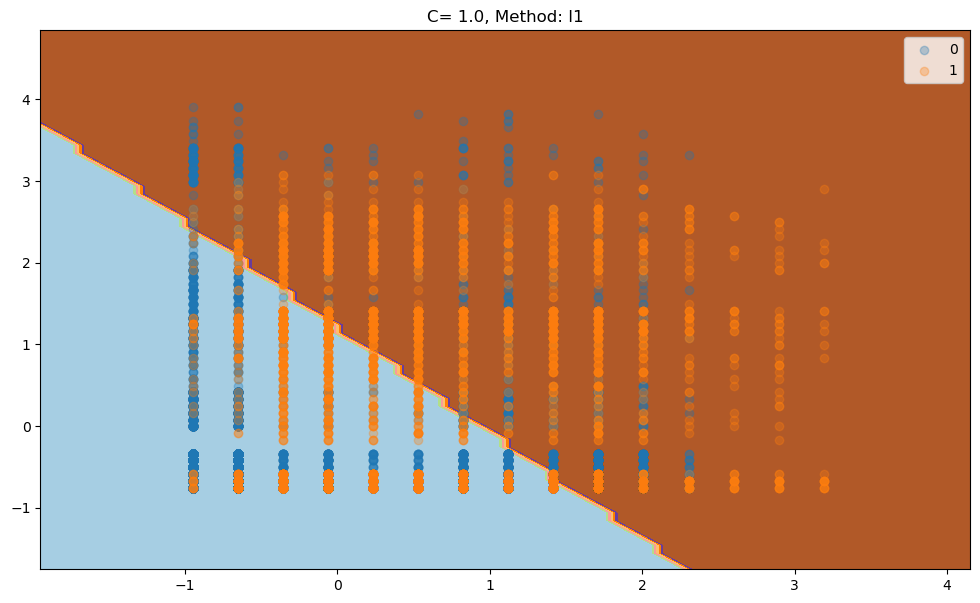

C = 1.0, Method: l2, F1_score_train: 0.5468775476928094, F1_score_test: 0.5809280233832663


C:\Users\Damian\AppData\Local\Temp\ipykernel_7520\4294122314.py:42: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3, label=class_value)


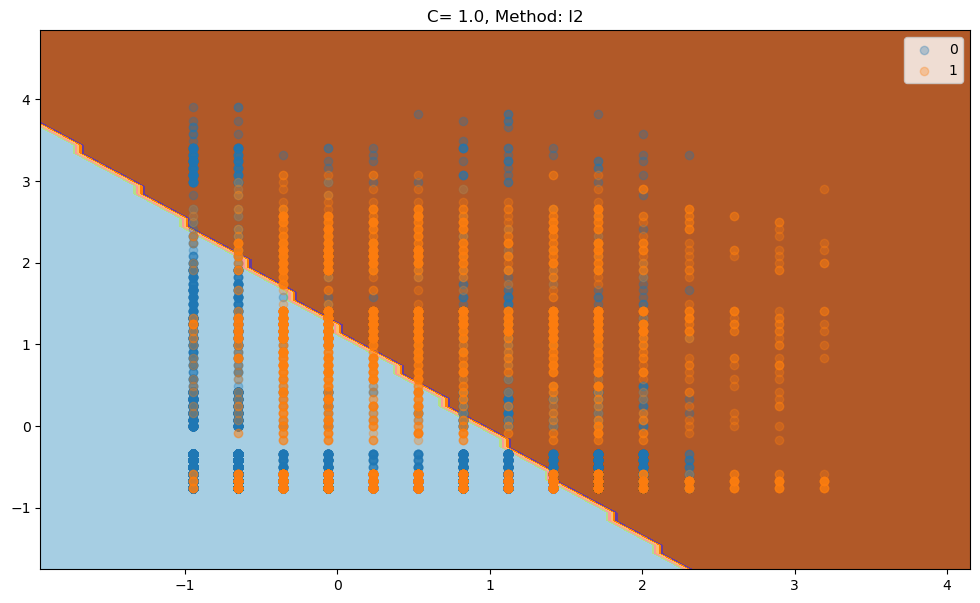

C = 1.0, Method: elasticnet, F1_score_train: 0.5468775476928094, F1_score_test: 0.5809280233832663


C:\Users\Damian\AppData\Local\Temp\ipykernel_7520\4294122314.py:42: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3, label=class_value)


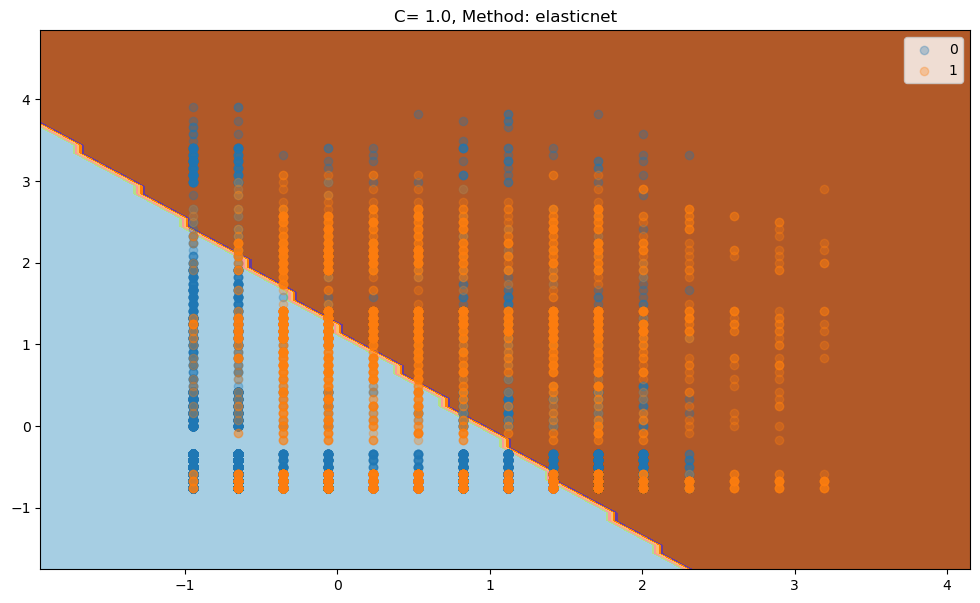

C = 0.5, Method: l1, F1_score_train: 0.5468775476928094, F1_score_test: 0.5809280233832663


C:\Users\Damian\AppData\Local\Temp\ipykernel_7520\4294122314.py:42: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3, label=class_value)


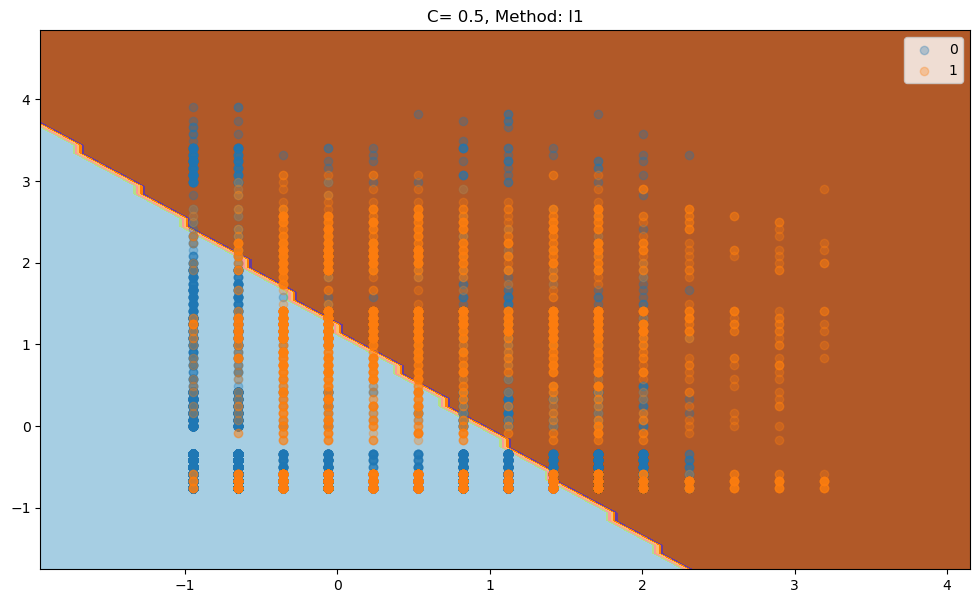

C = 0.5, Method: l2, F1_score_train: 0.5468775476928094, F1_score_test: 0.5809280233832663


C:\Users\Damian\AppData\Local\Temp\ipykernel_7520\4294122314.py:42: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3, label=class_value)


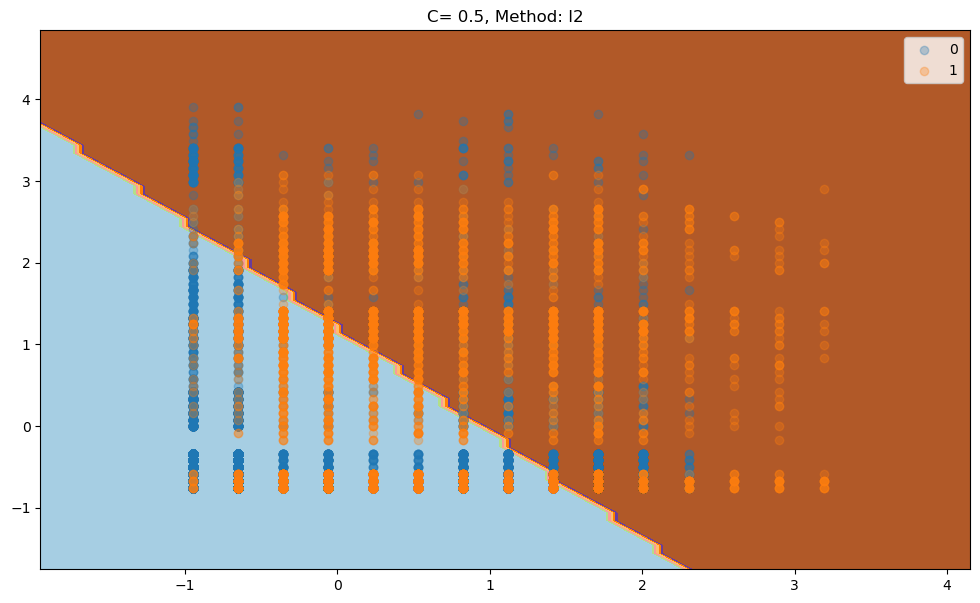

C = 0.5, Method: elasticnet, F1_score_train: 0.5468775476928094, F1_score_test: 0.5809280233832663


C:\Users\Damian\AppData\Local\Temp\ipykernel_7520\4294122314.py:42: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3, label=class_value)


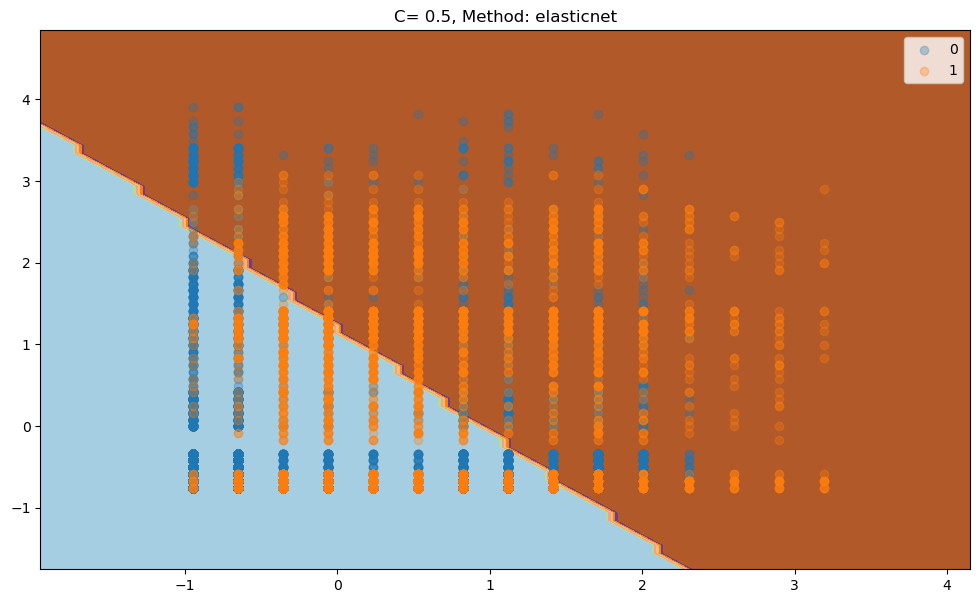

C = 0.01, Method: l1, F1_score_train: 0.5353233830845772, F1_score_test: 0.5671752884257536


C:\Users\Damian\AppData\Local\Temp\ipykernel_7520\4294122314.py:42: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3, label=class_value)


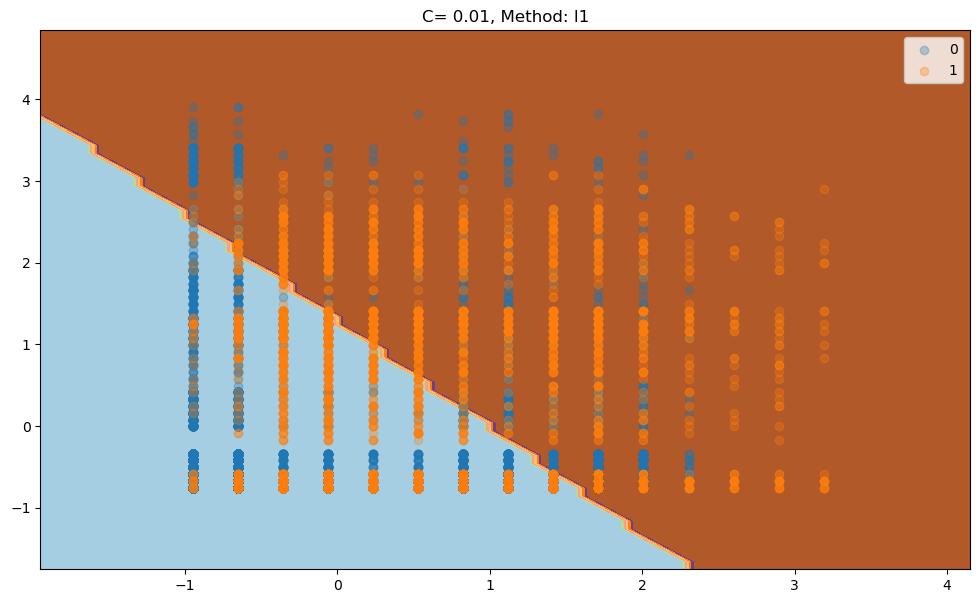

C = 0.01, Method: l2, F1_score_train: 0.5367549668874172, F1_score_test: 0.5674972108590555


C:\Users\Damian\AppData\Local\Temp\ipykernel_7520\4294122314.py:42: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3, label=class_value)


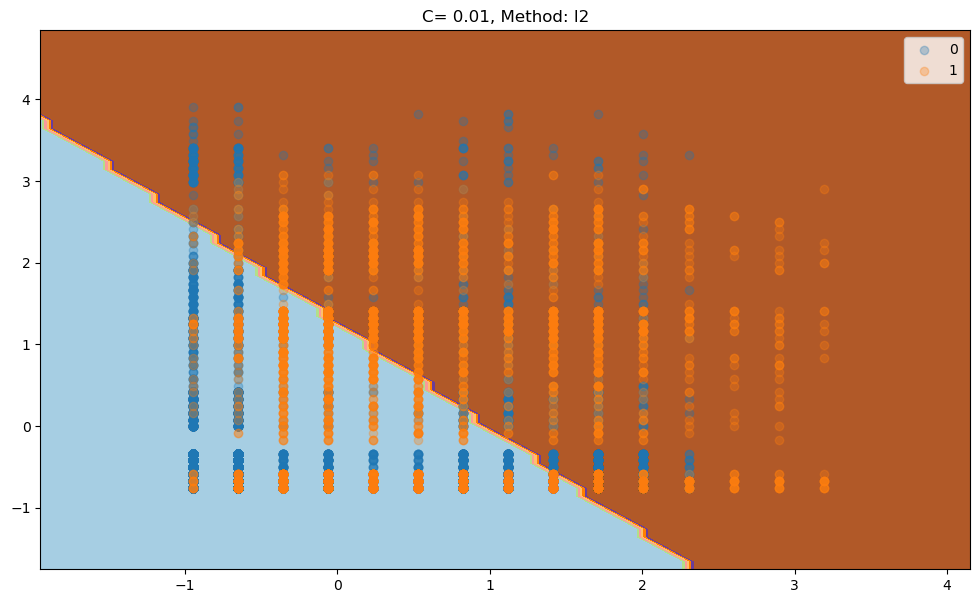

C = 0.01, Method: elasticnet, F1_score_train: 0.5367793240556661, F1_score_test: 0.5671752884257536


C:\Users\Damian\AppData\Local\Temp\ipykernel_7520\4294122314.py:42: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3, label=class_value)


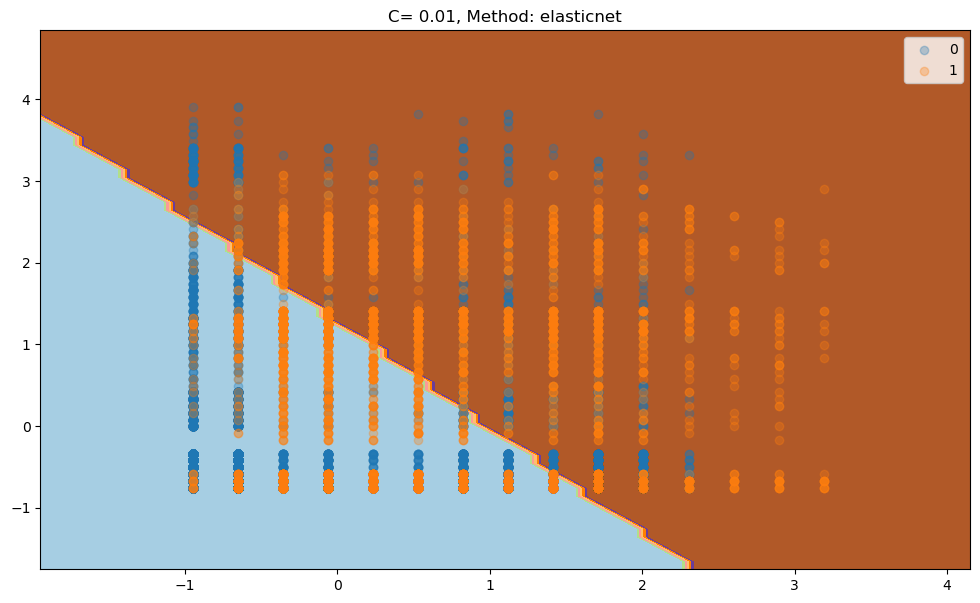

In [25]:
for element in C:
    for method in penalty:
        if method=="elasticnet":
            model_lr = LogisticRegression(C=element,penalty=method,solver="saga",l1_ratio=0.5)
            model_lr.fit(X_train_standardized, y_train)
            plot_classification_surface(X_plot=X_train_standardized, y_plot=y_train, trained_model=model_lr,element=element,method=method)
        else:
            model_lr = LogisticRegression(C=element,penalty=method,solver="saga")
            model_lr.fit(X_train_standardized, y_train)
            plot_classification_surface(X_plot=X_train_standardized, y_plot=y_train, trained_model=model_lr,element=element,method=method)

# No model shows an overfitting. All F1 scores are pretty mediocre. This indicates a subpar description. Furthermore, alle scores are very similar for all employed C values and the models used. Only the smallest C value leads to a small variation in the F1 score. In this case, the prediction is not highly affected by the C value and the model that is used.